In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import gdown 


In [ ]:
gdown.download("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-z8FmkaDaJSgrwMclvLuw8cWqq0dzZG_Fxw&usqp=CAU", output = 'img.png')

Downloading...
From: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-z8FmkaDaJSgrwMclvLuw8cWqq0dzZG_Fxw&usqp=CAU
To: c:\Users\Lenovo\Downloads\img.png
100%|██████████| 3.35k/3.35k [00:00<00:00, 838kB/s]


'img.png'

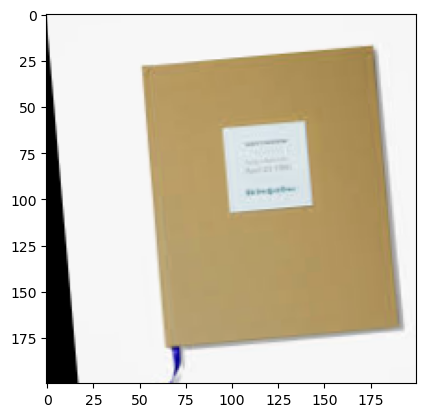

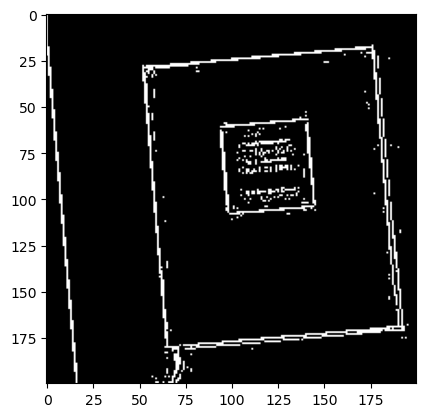

In [ ]:
img = cv2.imread('img.png')
rotate_15_mat = cv2.getRotationMatrix2D((0, 0), 5, 1)
img = cv2.warpAffine(img, rotate_15_mat, (200, 200))
plt.imshow(img)
plt.show()
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edge_img =  cv2.Laplacian(gray_img, cv2.CV_64F) > 10
plt.imshow(edge_img, cmap = 'gray')
plt.show()



In [ ]:
theta_min = -np.pi / 2
theta_max = np.pi / 2
rho_min = -np.sqrt(img.shape[0]**2 + img.shape[1]**2)
rho_max = -rho_min
num_column = 400
num_row = 400
delta_theta = (theta_max - theta_min) / num_column
delta_rho = (rho_max - rho_min) / num_row
threshold = 55


def index2theta(i):
    return theta_min + i * delta_theta + delta_theta / 2

def theta2index(theta):
    return int((theta - theta_min) / delta_theta)

def index2rho(j):
    return rho_min + j * delta_rho + delta_rho / 2

def rho2index(rho):
    return int((rho - rho_min) / delta_rho)


In [ ]:

#part1
def get_hough_accumulator(edge_img, theta_max, theta_min, rho_max, rho_min, num_column, num_row):
    hough_accumulator = np.zeros((num_row, num_column))
    for i in range(edge_img.shape[0]):
        for j in range(edge_img.shape[1]):
            if edge_img[i][j] > 0:
                for k in range(num_column):
                    theta = index2theta(k)
                    rho = i * np.cos(theta) + j * np.sin(theta)
                    hough_accumulator[rho2index(rho)][k] += 1
    return hough_accumulator



In [ ]:
#part2
def accumulator_to_lines(accumulator, threshold):
    lines = []
    for i in range(accumulator.shape[0]):
        for j in range(accumulator.shape[1]):
            if accumulator[i, j] > threshold:
                lines.append((index2rho(i), index2theta(j)))
    return lines

In [ ]:
#preprocessing for part2
def my_non_maximum_suppression(accumulator):
    for i in range(accumulator.shape[0]):
        for j in range(accumulator.shape[1]):
            SW = accumulator[max(0, i - 1)][max(0, j - 1)]
            S = accumulator[max(0, i - 1)][j]
            SE = accumulator[max(0, i - 1)][min(accumulator.shape[1] - 1, j + 1)]
            W = accumulator[i][max(0, j - 1)]
            E = accumulator[i][min(accumulator.shape[1] - 1, j + 1)]
            NW = accumulator[min(accumulator.shape[0] - 1, i + 1)][max(0, j - 1)]
            N = accumulator[min(accumulator.shape[0] - 1, i + 1)][j]
            NE = accumulator[min(accumulator.shape[0] - 1, i + 1)][min(accumulator.shape[1] - 1, j + 1)]
            if accumulator[i][j] < SW or accumulator[i][j] < S or accumulator[i][j] < SE or accumulator[i][j] < W or accumulator[i][j] < E or accumulator[i][j] < NW or accumulator[i][j] < N or accumulator[i][j] < NE:
                accumulator[i][j] = 0
    return accumulator
                

In [ ]:
#combine 2 part to an algorithm
def hough_line_detection(edge_img, theta_max, theta_min, rho_max, rho_min, num_column, num_row, threshold):
    hough_accumulator = get_hough_accumulator(edge_img, theta_max, theta_min, rho_max, rho_min, num_column, num_row)
    hough_accumulator = my_non_maximum_suppression(hough_accumulator)
    lines = accumulator_to_lines(hough_accumulator, threshold)
    return lines


In [ ]:
#show image result from algorithm
def show_image_with_lines(img, lines):
    for rho, theta in lines:
        a, b = np.sin(theta), np.cos(theta)
        x0, y0 = a * rho, b * rho 
        cv2.line(img, (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))), 
                    (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))), 
                    (0, 0, 255), 1)
    plt.imshow(img)
    plt.show()



In [ ]:
hough_lines = hough_line_detection(edge_img, theta_max, theta_min, rho_max, rho_min, num_column, num_row, threshold)

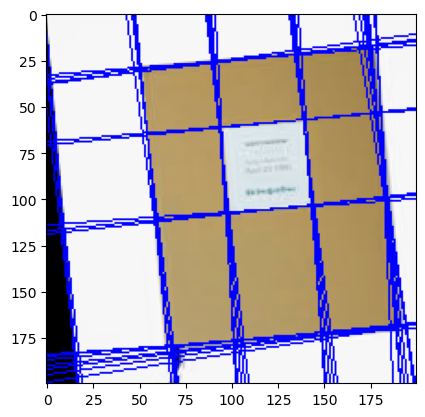

In [ ]:
show_image_with_lines(img, hough_lines)